In [56]:
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import matplotlib.gridspec as gridspec

import scipy
from scipy import interpolate
from scipy.sparse import diags
import scipy.sparse as sp


In [57]:
# constant variables
PI = math.pi

# define diffusion coefficient
Diff_h = 10.0 # [m2 s-1]
Diff_z = 0.15 # [m2 s-1]

# define a fixed wind field
U_shear = 0.002 # [s-1]
# U_shear = 0.00002

In [58]:
# creating plotting map/domain

# grid resolution
Dh = 2000 # [m]
Dz = 20 # [m]

Nh = 1000
Nz = 100

ih_init = round(Nh/2)
iz_init = round(Nz/2)
print('center:',ih_init,iz_init)

h = []
for ih in range(Nh):
    h.append((ih-ih_init)*Dh)
    
z = []
for iz in range(Nz):
    z.append((iz-iz_init)*Dz)

H, Z = np.meshgrid(h, z)

center: 500 50


In [59]:
# *** Attention: this gaussian analytical results does NOT requires Dv=Dh
# Chris J. Walcek-A Gaussian dispersionplume model explicitly account

cc = 1.0 # [kg] or [kg/s]
def CrossSection_Concnt_2D(time, Diff_h, Diff_z, U_shear, Nh, Nz, X, Y, cc):
    # time = ? [s]
    # Diff_h, Diff_z are horizontal and vertical diffusivity
    # U_shear is vertical wind shear
    # X, Y form a 2D grid/domain with grid number [Nz, Nh]
    # cc: initial injection mass

    # gaussian analytical result
    Sigma_h = math.sqrt( 2.0*Diff_h*time ) # [m]
    Sigma_z = math.sqrt( 2.0*Diff_z*time ) # [m]

    s = U_shear*time* Sigma_z/Sigma_h

    C_gau = np.zeros([Nz,Nh])

    for iz in range(Nz):
        for ih in range(Nh):
            C_gau[iz,ih] = cc/( 2*PI*Sigma_h*Sigma_z*math.sqrt(1+s**2/12) )* \
                            math.exp(-X[iz,ih]**2/(2*Sigma_h**2*(1+s**2/12)) \
                                     -Y[iz,ih]**2*(1+s**2 /3)/(2*Sigma_z**2*(1+s**2/12)) \
                                     +X[iz,ih]*Y[iz,ih]/(2*Sigma_h*Sigma_z)*(s/(1+s**2/12))
                                     )
    Rh = Sigma_h + 2/3*math.sqrt(2.0*Diff_z)*U_shear*(time**3/2)
    Rz = Sigma_z
    
    return Rh, Rz, C_gau


# Plot 2-D concentration distribution

37916487.353350446
34408935280.672585
389292663512.1641


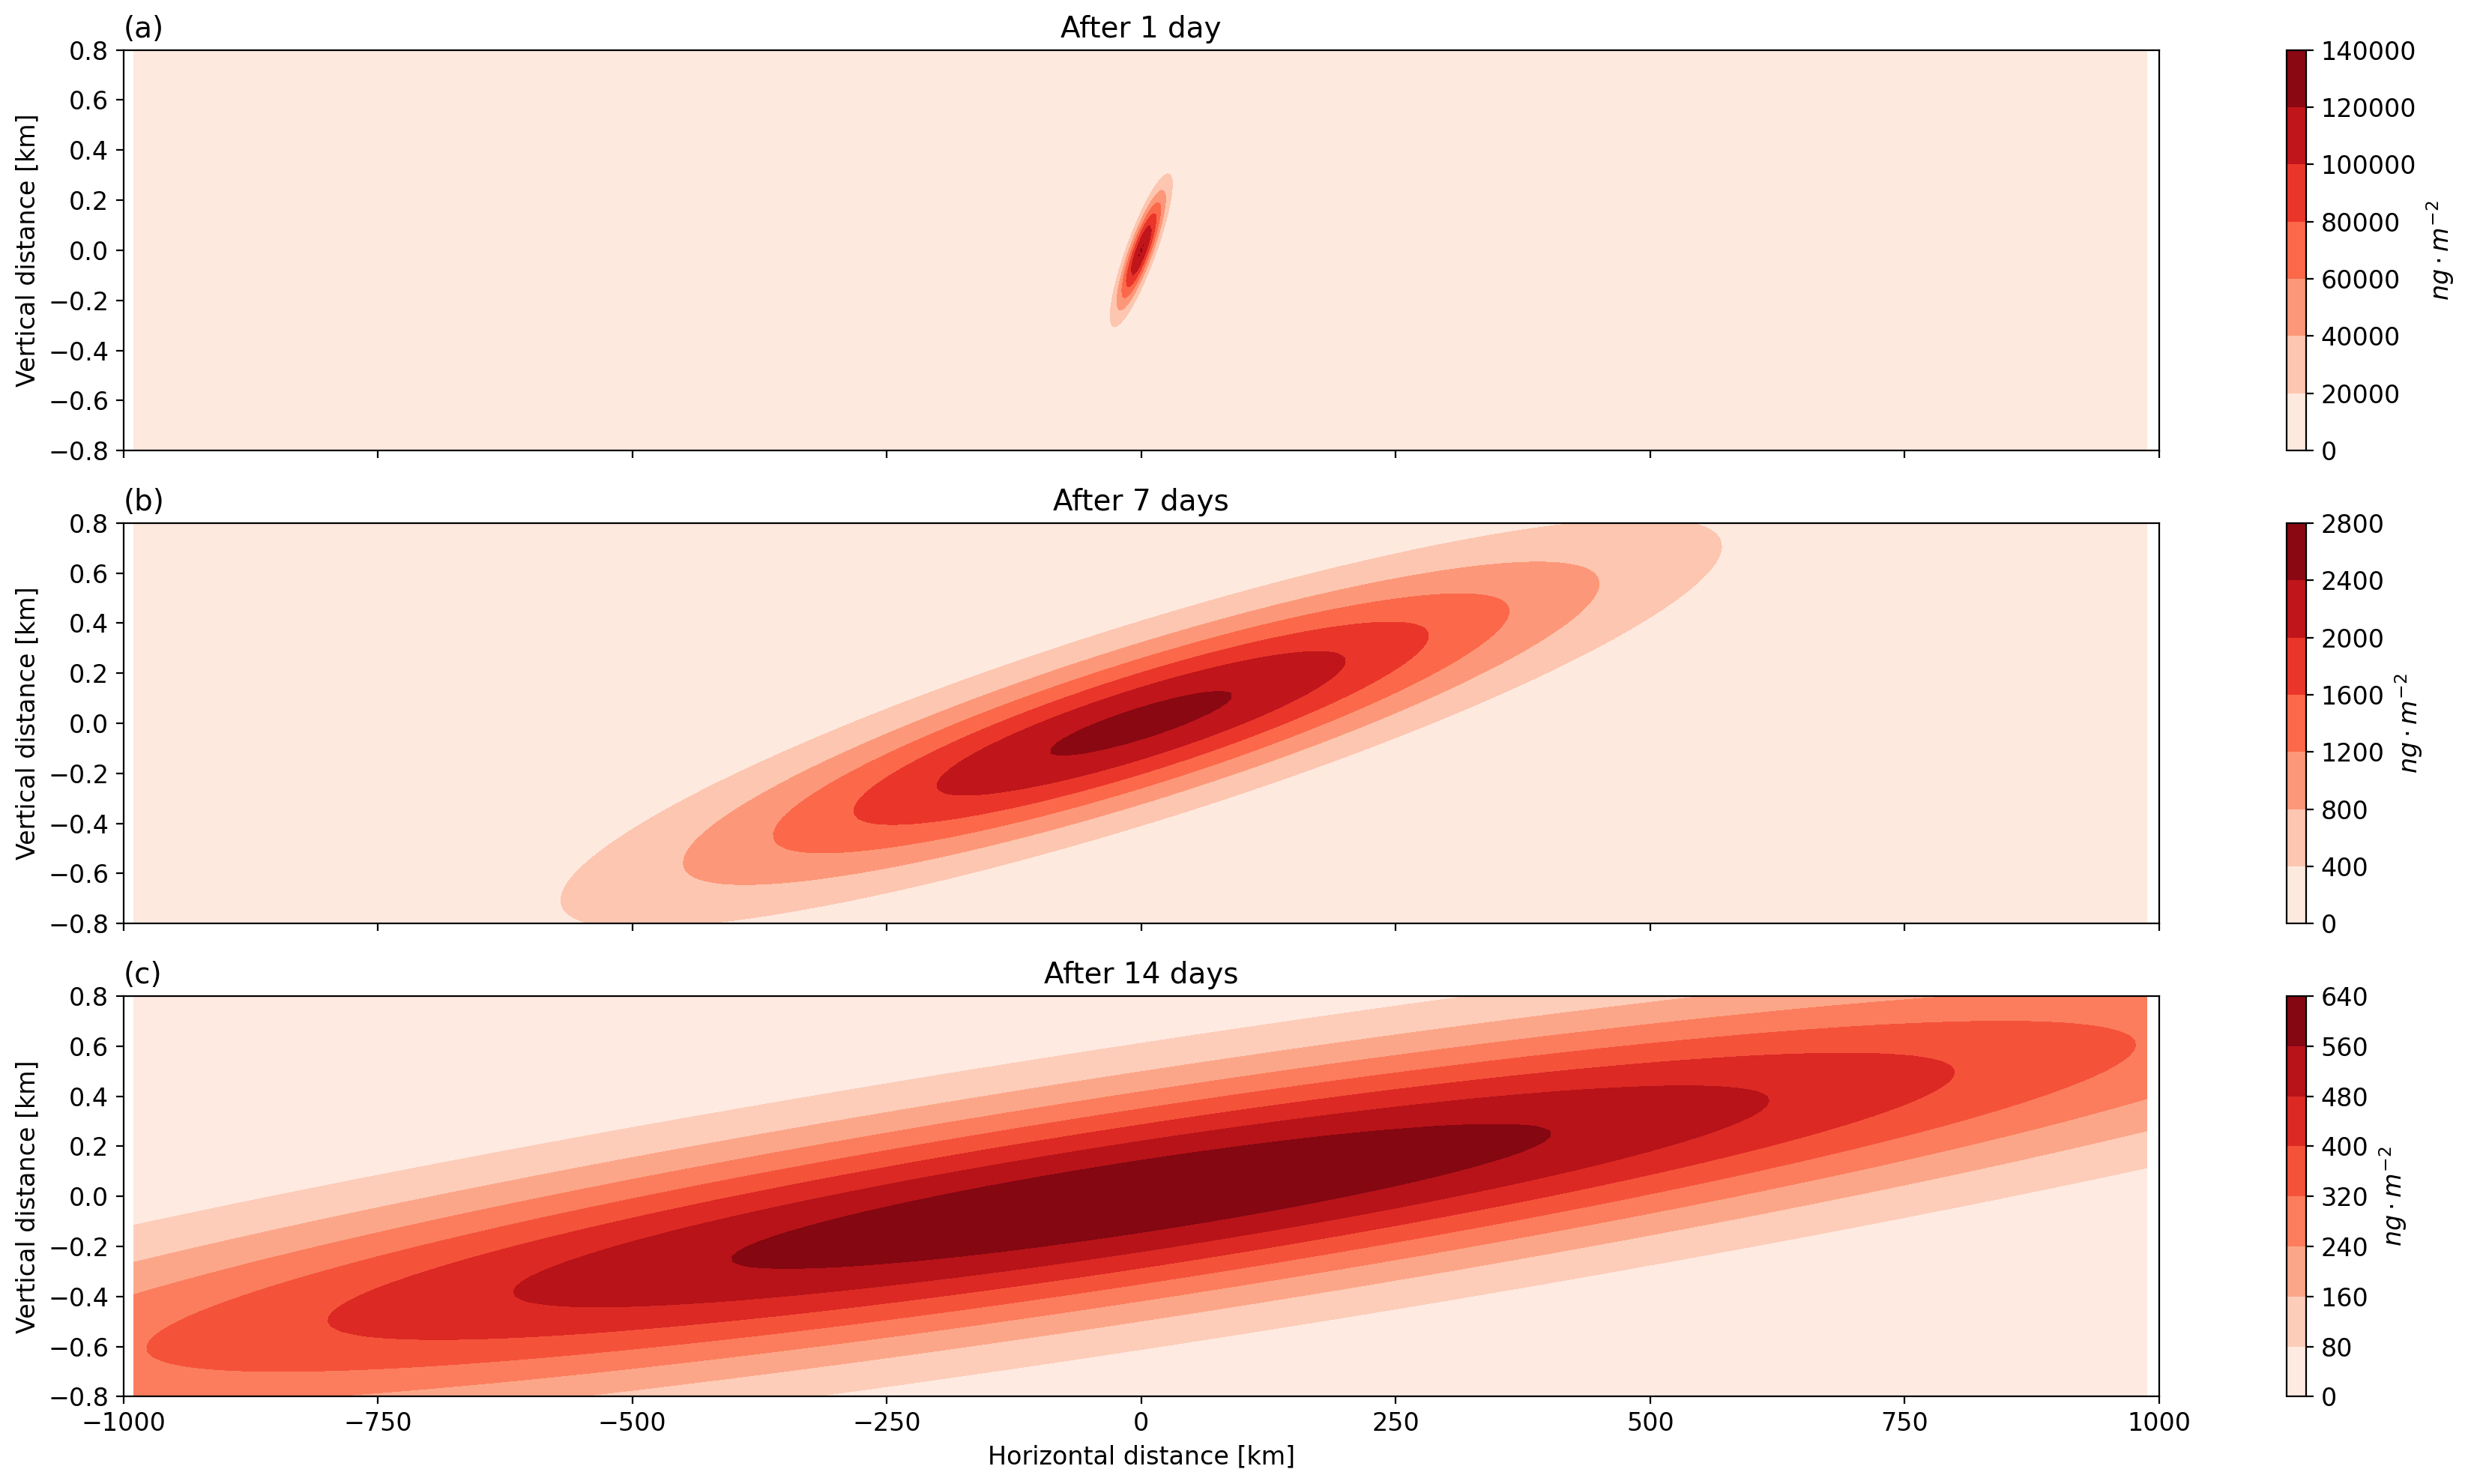

In [60]:
fig = plt.figure(figsize=(18,10), dpi=200)

### 1 day
time1 = 24*3600 # [s]
Rh1, Rz1, C1_gau = CrossSection_Concnt_2D(time1, Diff_h, Diff_z, U_shear, Nh, Nz, H, Z, cc)
print(Rh1*Rz1/1e6)

# plot
ax1 = plt.subplot(3,1,1)
# levs = np.arange(0.5,4.0,0.5)*1e-8 * 1e12
ax1_contours = ax1.contourf(H[5:-5,5:-5]/1000, Z[5:-5,5:-5]/1000, C1_gau[5:-5,5:-5] *1e12, \
                        cmap='Reds')
# ax2.plot(0, 0, 'k.')

cbar1 = plt.colorbar(ax1_contours, ax=ax1)
cbar1.ax.set_ylabel('$ng \cdot m^{-2}$',fontsize=12)
cbar1.ax.tick_params(labelsize=12)

ax1.set_title('(a)',fontsize=14,loc='left')
ax1.set_title('After 1 day',fontsize=14)

ax1.set_xlim([-1000,1000])
ax1.set_ylim([-0.8,0.8])

ax1.tick_params(axis='x', labelbottom=False, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax1.set_ylabel('Vertical distance [km]',fontsize=12);


### 7 days
time2 = 7*24*3600 # [s]
Rh2, Rz2, C2_gau = CrossSection_Concnt_2D(time2, Diff_h, Diff_z, U_shear, Nh, Nz, H, Z, cc)
print(Rh2*Rz2/1e6)

# plot
ax2 = plt.subplot(3,1,2)
ax2_contours = ax2.contourf(H[5:-5,5:-5]/1000, Z[5:-5,5:-5]/1000, C2_gau[5:-5,5:-5] *1e12, \
                        cmap='Reds')
# ax2.plot(0, 0, 'k.')

cbar2 = plt.colorbar(ax2_contours, ax=ax2)
cbar2.ax.set_ylabel('$ng \cdot m^{-2}$',fontsize=12)
cbar2.ax.tick_params(labelsize=12)

ax2.set_title('(b)',fontsize=14,loc='left')
ax2.set_title('After 7 days',fontsize=14)

ax2.set_xlim([-1000,1000])
ax2.set_ylim([-0.8,0.8])

ax2.tick_params(axis='x', labelbottom=False, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.set_ylabel('Vertical distance [km]',fontsize=12);


### 14 day
time3 = 14*24*3600 # [s]
Rh3, Rz3, C3_gau = CrossSection_Concnt_2D(time3, Diff_h, Diff_z, U_shear, Nh, Nz, H, Z, cc)
print(Rh3*Rz3/1e6)

# plot
ax3 = plt.subplot(3,1,3)

ax3_contours = ax3.contourf(H[5:-5,5:-5]/1000, Z[5:-5,5:-5]/1000, C3_gau[5:-5,5:-5] *1e12, \
                        cmap='Reds')

cbar3 = plt.colorbar(ax3_contours, ax=ax3)
cbar3.ax.set_ylabel('$ng \cdot m^{-2}$',fontsize=12)
cbar3.ax.tick_params(labelsize=12)

ax3.set_title('(c)',fontsize=14,loc='left')
ax3.set_title('After 14 days',fontsize=14)

ax3.set_xlim([-1000,1000])
ax3.set_ylim([-0.8,0.8])

ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)

ax3.set_ylabel('Vertical distance [km]',fontsize=12);
ax3.set_xlabel('Horizontal distance [km]',fontsize=12);

fig.tight_layout();

# fit line to identify long and short radius of the ellipse

In [61]:
def CrossSection_Concnt_1D(time, Diff_h, Diff_z, U_shear, xx, yy_1D, cc):
    # time = ? [s]
    # Diff_h, Diff_z are horizontal and vertical diffusivity
    # U_shear is vertical wind shear
    # X, Y form a 2D grid/domain with grid number [Nz, Nh]
    # cc: initial injection mass

    # gaussian analytical result
    Sigma_h = math.sqrt( 2.0*Diff_h*time ) # [m]
    Sigma_z = math.sqrt( 2.0*Diff_z*time ) # [m]

    s = U_shear*time* Sigma_z/Sigma_h

    C_1D = np.zeros([Nz])
    for iz in range(Nz):
        C_1D[iz] = cc/( 2*PI*Sigma_h*Sigma_z*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma_h**2*(1+s**2/12)) \
                                 -yy_1D[iz]**2*(1+s**2 /3)/(2*Sigma_z**2*(1+s**2/12)) \
                                 +xx*yy_1D[iz]/(2*Sigma_h*Sigma_z)*(s/(1+s**2/12))
                                )
    
    return C_1D


def find_zz(zz_1D, concnt_1D):
    # find the zz value that corresponds to the max concnt
    
    idx = np.argmax(concnt_1D)
    zz_max = zz_1D[idx]

    return zz_max

0.7874978653790133


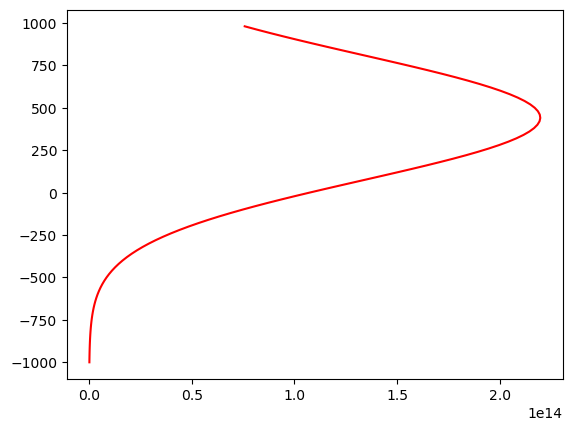

In [73]:

day = 21
time = day*24*3600

xx3   = 2**(day/2)*math.sqrt(2.0*Diff_z*time)
zz3_1D = Z[:,0]
C3_1D = CrossSection_Concnt_1D(time, Diff_h, Diff_z, U_shear, xx3, zz3_1D, cc)*1e12
zz3 = find_zz(zz3_1D, C3_1D)
k_Ra = zz3/xx3 # along long radius
k_Rb = -1/k_Ra

plt.plot(C3_1D*1e12, zz3_1D, 'r')

# C1_1D[iz_init-5:iz_init+6]
# C2_1D[iz_init-5:iz_init+6]

xx3_max   = 0
zz3_1D_max = Z[:,0]
C3_1D_max = CrossSection_Concnt_1D(time, Diff_h, Diff_z, U_shear, xx3_max, zz3_1D_max, cc)*1e12
print(max(C3_1D)/max(C3_1D_max))

# Calculate and plot concentration distribution along long and short radius

In [64]:
def CrossSection_Concnt_points(time, Diff_h, Diff_z, U_shear, xx_1D, zz_1D, cc):
    # time = ? [s]
    # Diff_h, Diff_z are horizontal and vertical diffusivity
    # U_shear is vertical wind shear
    # X, Y form a 2D grid/domain with grid number [Nz, Nh]
    # cc: initial injection mass

    # gaussian analytical result
    Sigma_h = math.sqrt( 2.0*Diff_h*time ) # [m]
    Sigma_z = math.sqrt( 2.0*Diff_z*time ) # [m]

    s = U_shear*time* Sigma_z/Sigma_h

    if len(xx_1D)!=len(zz_1D): 
        print('ERROR: xx and zz do not have same size!!!')
    
    Np = len(xx_1D)
    C_1D = np.zeros([Np])
    for i in range(Np):
        C_1D[i] = cc/( 2*PI*Sigma_h*Sigma_z*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx_1D[i]**2/(2*Sigma_h**2*(1+s**2/12)) \
                                 -zz_1D[i]**2*(1+s**2 /3)/(2*Sigma_z**2*(1+s**2/12)) \
                                 +xx_1D[i]*zz_1D[i]/(2*Sigma_h*Sigma_z)*(s/(1+s**2/12))
                                    )
    
    return C_1D

279.0594782997439
-1848.485005234662 136.5291612981769
-1787.8789394892633 142.97359334126136
We select a Ra values that is about 0.1*max(concnt), which is Ra=1848.49 km here


3000.0002543972387

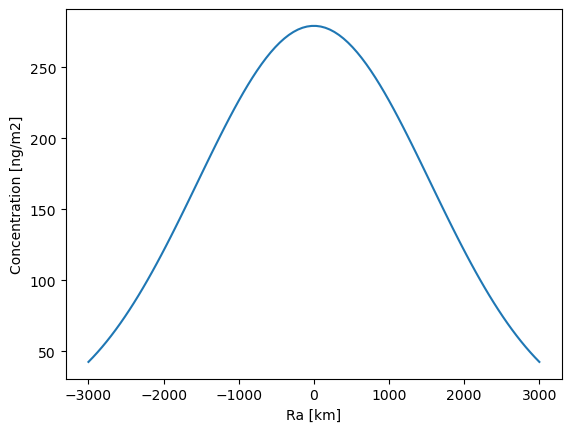

In [65]:
# along long radius Ra:

Xs1 = np.linspace(-3e6, 3e6, 100)
Zs1 = k_Ra*Xs1
Cs1 = CrossSection_Concnt_points(time, Diff_h, Diff_z, U_shear, Xs1, Zs1, cc)*1e12
Ra = (Xs1**2 + Zs1**2)**0.5 * (Xs1/abs(Xs1))/1000 # km

plt.plot(Ra, Cs1)
plt.xlabel('Ra [km]')
plt.ylabel('Concentration [ng/m2]');

print(max(Cs1))
print(Ra[19], Cs1[19])
print(Ra[20], Cs1[20])

for i in range(len(Ra)):
    if Cs1[i]>0.1*max(Cs1):
        Ra_final = abs(Ra[i])
        break;

print(f'We select a Ra values that is about 0.1*max(concnt), which is Ra={-1*Ra[19]:.2f} km here')

Ra_final

278.9624814860692
0.6666667231993862 54.52529049148844
0.6424242969012267 61.26848157414421
We select a Rb values that is about 0.1*max(concnt), which is Rb=0.67 km here


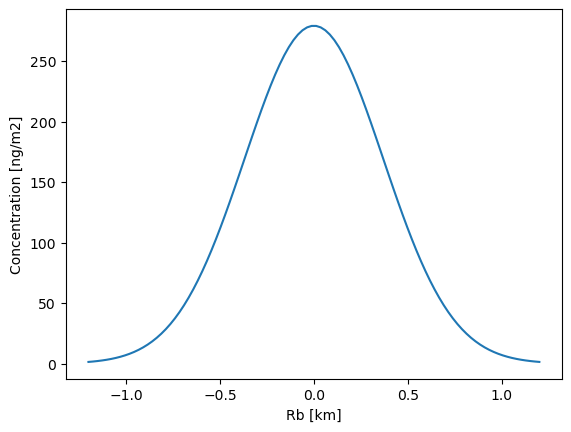

In [66]:
# along short radius Rb:

Zs2 = np.linspace(-1200, 1200, 100)
Xs2 = Zs2/k_Rb
Cs2 = CrossSection_Concnt_points(time, Diff_h, Diff_z, U_shear, Xs2, Zs2, cc)*1e12
Rb = (Xs2**2 + Zs2**2)**0.5 * (Xs2/abs(Xs2)) / 1000

plt.plot(Rb, Cs2)
plt.xlabel('Rb [km]')
plt.ylabel('Concentration [ng/m2]');

print(max(Cs2))
print(Rb[22], Cs2[22])
print(Rb[23], Cs2[23])

print(f'We select a Rb values that is about 0.1*max(concnt), which is Rb={Rb[22]:.2f} km here')

1609146651727.9668


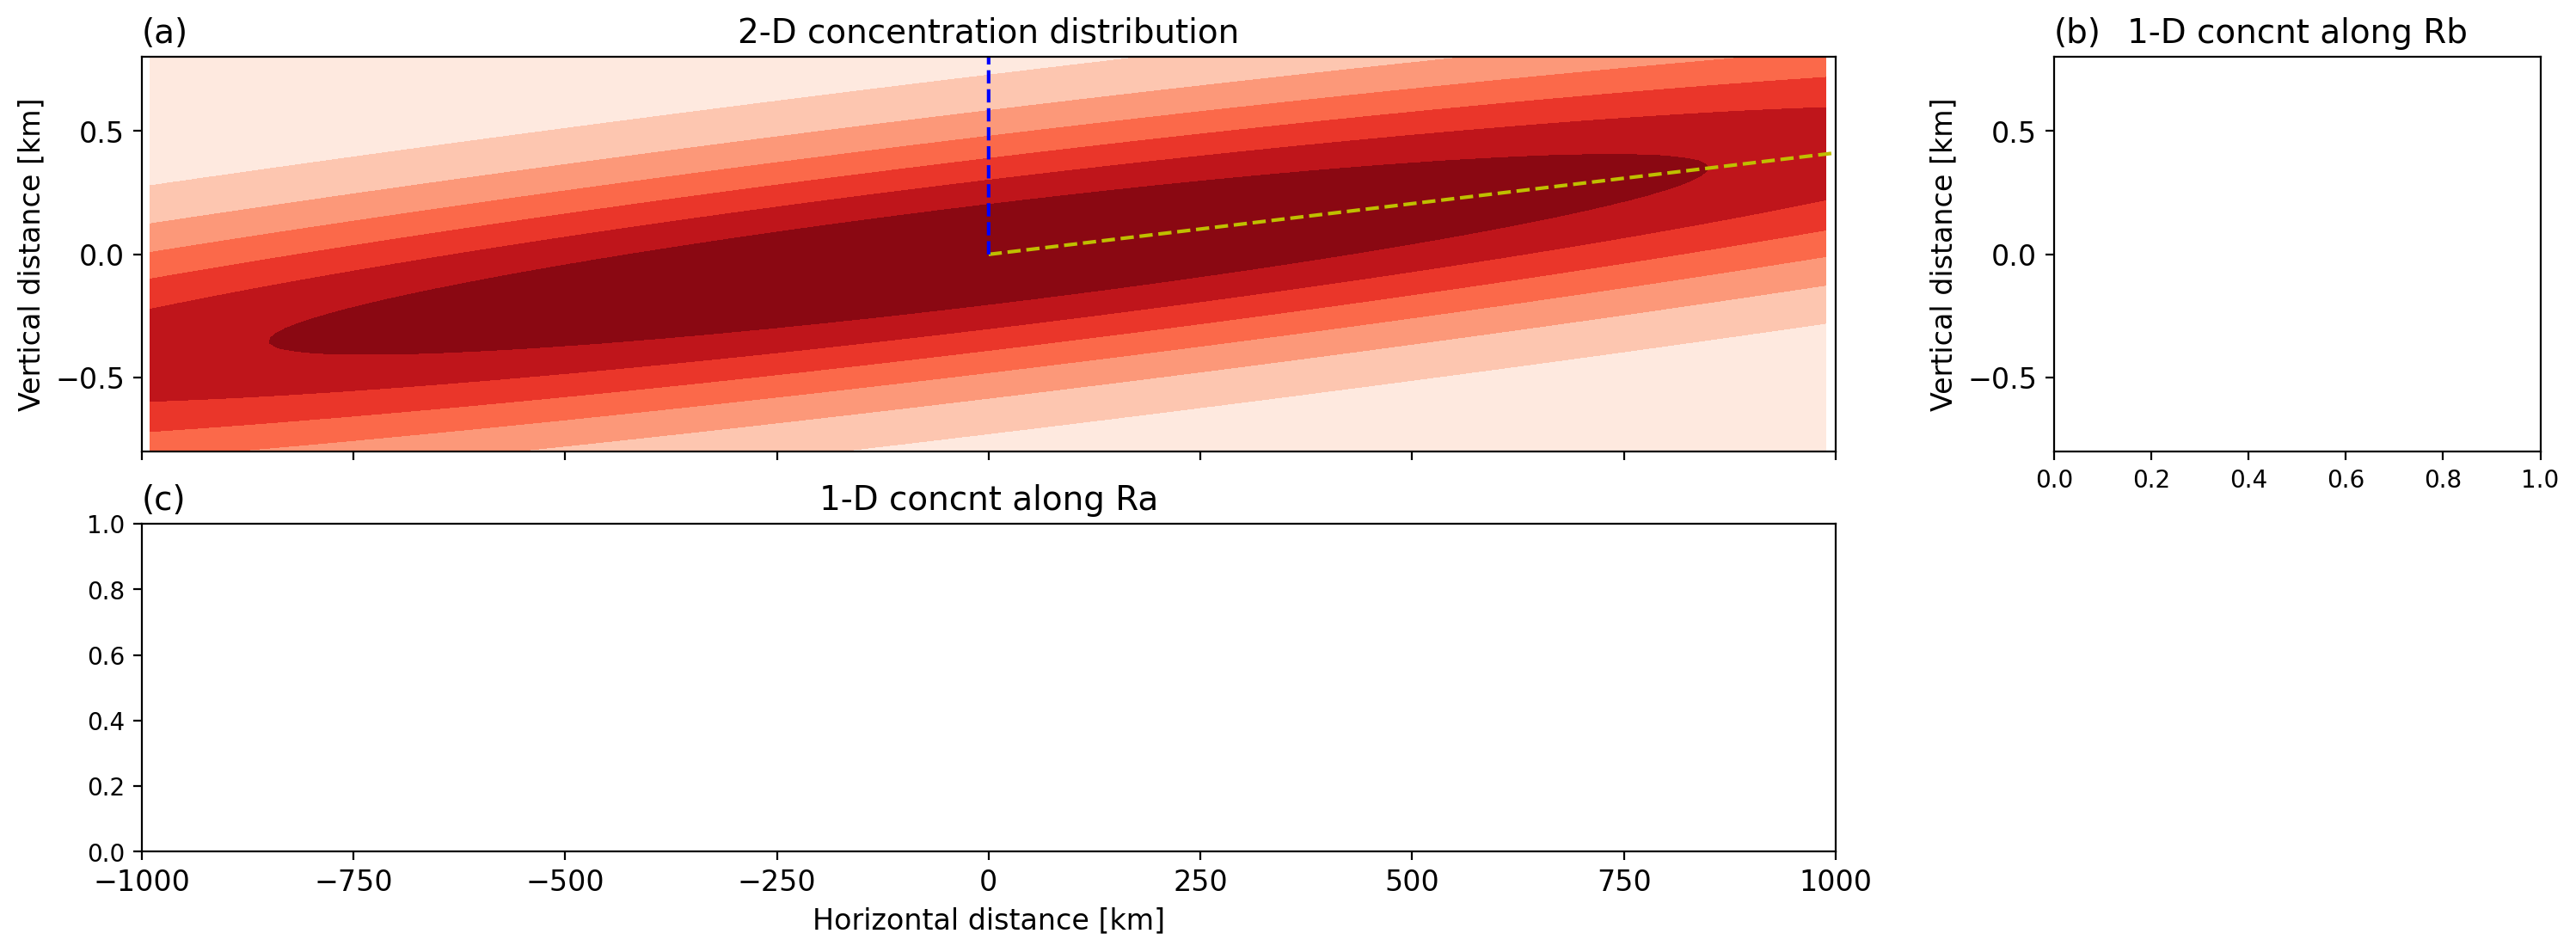

In [67]:
fig = plt.figure(figsize=(18,6), dpi=200)

gs = gridspec.GridSpec(24, 24, figure=fig)

### 21 day
time1 = 21*24*3600 # [s]
Rh1, Rz1, C1_gau = CrossSection_Concnt_2D(time1, Diff_h, Diff_z, U_shear, Nh, Nz, H, Z, cc)
print(Rh1*Rz1/1e6)

# plot
ax1 = fig.add_subplot(gs[0:12, 0:17])
# ax1 = plt.subplot(3,1,1)
# levs = np.arange(0.5,4.0,0.5)*1e-8 * 1e12
ax1_contours = ax1.contourf(H[5:-5,5:-5]/1000, Z[5:-5,5:-5]/1000, C1_gau[5:-5,5:-5] *1e12, \
                        cmap='Reds')

ax1_point = ax1.plot([0,xx3/1000], [0,zz3/1000], 'y--')
ax1_point = ax1.plot([0,-20/1000], [0,-k_Rb*20/1000], 'b--')

# cbar1 = plt.colorbar(ax1_contours, ax=ax1)
# cbar1.ax.set_ylabel('$ng \cdot m^{-2}$',fontsize=12)
# cbar1.ax.tick_params(labelsize=12)

ax1.set_title('(a)',fontsize=14,loc='left')
ax1.set_title('2-D concentration distribution',fontsize=14)

ax1.set_xlim([-1000,1000])
ax1.set_ylim([-0.8,0.8])

ax1.tick_params(axis='x', labelbottom=False, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax1.set_ylabel('Vertical distance [km]',fontsize=12);

###
ax2 = fig.add_subplot(gs[0:12, 19:24])



ax2.set_title('(b)',fontsize=14,loc='left')
ax2.set_title('1-D concnt along Rb',fontsize=14)

# ax2.set_xlim([-1000,1000])
ax2.set_ylim([-0.8,0.8])

# ax2.tick_params(axis='x', labelbottom=False, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.set_ylabel('Vertical distance [km]',fontsize=12);

###
ax3 = fig.add_subplot(gs[14:24, 0:17])



ax3.set_title('(c)',fontsize=14,loc='left')
ax3.set_title('1-D concnt along Ra',fontsize=14)

ax3.set_xlim([-1000,1000])
# ax3.set_ylim([-0.8,0.8])

ax3.tick_params(axis='x', labelsize=12)
# ax3.tick_params(axis='y', labelsize=12)

ax3.set_xlabel('Horizontal distance [km]',fontsize=12);

# fig.tight_layout();